In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
df_players = pd.read_csv("jogadores.csv")
df_matches = pd.read_csv("partidas.csv")

In [95]:
df_players = df_players[["nome","rank","idade","email"]]
df_matches = df_matches[df_matches["score1"]!=df_matches["score2"]].reset_index(drop = True)
df_matches

,p1,p2,score1,score2,tempo,p1_venceu
0,29,185,0,2,600,False
1,571,573,8,6,600,True
2,167,83,5,6,600,False
3,402,202,8,3,600,True
4,551,161,3,4,600,False
...,...,...,...,...,...,...
1791,303,544,10,0,136,True
1792,563,344,5,3,600,True
1793,496,454,8,1,600,True
1794,186,551,4,1,600,True


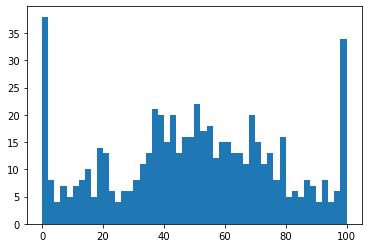

In [91]:
plt.hist(df_players["rank"],50)
plt.show()

In [128]:
#Player mais fracassado:
#Criar coluna para verificar o vencedor:
df_matches["p1_venceu"] = (df_matches["score1"]>df_matches["score2"])
df_players["vitorias"] = 0
df_players["partidas-jogadas"] = 0
for i in range(df_matches.shape[0]):
    linha = df_matches.iloc[i]
    win = linha["p1_venceu"].copy()
    p1 = linha["p1"].copy()
    p2 = linha["p2"].copy()
    if win:
        n = df_players.loc[p1,"vitorias"].copy() + 1
        df_players.loc[p1,"vitorias"] = n.copy()
    else:
        n = df_players.loc[p2,"vitorias"].copy() + 1
        df_players.loc[p2,"vitorias"] = n.copy()
    n = df_players.loc[p1,"partidas-jogadas"].copy() + 1
    df_players.loc[p1,"partidas-jogadas"] = n.copy()

    n = df_players.loc[p2,"partidas-jogadas"].copy() + 1
    df_players.loc[p2,"partidas-jogadas"] = n.copy()

df_players["perc_vit"]=df_players["vitorias"]/df_players["partidas-jogadas"]
df_players.sort_values(by=["perc_vit"])

KeyError: 'perc_vit'